In [1]:
import os
import shutil
import click
import h5py
import imageio
import scipy.ndimage as ndi

import time

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
annotations = pd.read_csv("/Users/celefthe/mesoscopy_testing/ccf_annotations.csv", delimiter=", ", engine="python")

aba_exclude = [
    "FRP1",
    "VISpl1",
    "VISpor1",
    "VISli1",
    "TEa1",
    "AUDd1",
    "AUDp1",
    "AUDpo1",
    "AUDv1",
    "ORBm1",
]

annotations = annotations[~annotations.acronym.isin(aba_exclude)]

aba_mask = imageio.imread("/Users/celefthe/mesoscopy_testing/ccf_template_top_140x142.tiff")
l_aba = imageio.imread("/Users/celefthe/mesoscopy_testing/ccf_template_top_140x142.tiff")
r_aba = np.flip(l_aba, axis=1)

In [3]:
annotations

,id,acronym,name
0,11,SSp-ul,Primary somatosensory area upper limb
6,578,MOp1,Primary motor area
7,584,MOs,Secondary motor area
9,753,PL1,Prelimbic area
10,866,RSPagl1,Retrosplenial area lateral agranular part
11,872,RSPd1,Retrosplenial area dorsal part
12,879,RSPv1,Retrosplenial area ventral part
13,970,SSp-bfd1,Primary somatosensory area barrel field
14,977,SSp-ll1,Primary somatosensory area lower limb
15,984,SSp-m1,Primary somatosensory area mouth


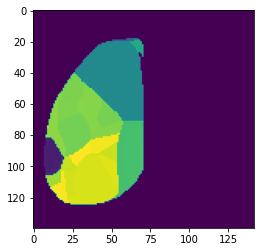

In [4]:
plt.imshow(aba_mask)

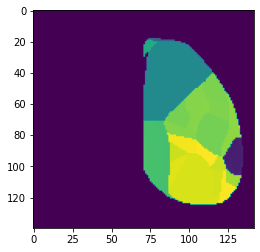

In [5]:
plt.imshow(np.flip(aba_mask, axis=1))

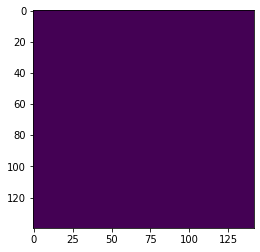

In [6]:
plt.imshow(np.ones([140, 142]))

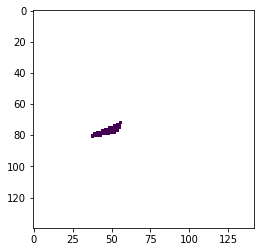

In [7]:
plt.imshow(np.ma.masked_array(np.ones([140, 142]), np.not_equal(l_aba, 998)))

In [8]:
np.ma.masked_array(np.ones([140, 142]), np.not_equal(l_aba, 578)).sum()

522.0

In [9]:
# f = h5py.File("/Users/celefthe/mesoscopy_testing/preprocessed/sub-MM237_exp-109hrb21d_ses-20220311_test-dataset-2mins_preprocessed-registered.h5")
f = h5py.File("/Users/celefthe/mesoscopy_testing/preprocessed/sub-MM045_ses-20210709_rest_preprocessed-registered.h5")
d = f["/F"]

In [30]:
d.shape

(22500, 140, 142)

In [31]:
ndi.mean(d[:], labels=aba_mask, index=11)

0.005277749294704861

In [20]:
np.ma.masked_array(d[10], np.not_equal(r_aba, 578)).count()

522

In [18]:
np.ma.masked_array(d[100], np.equal(l_aba, 998)).mean()

0.1356862779992407

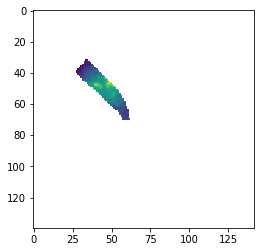

In [23]:
plt.imshow(np.ma.masked_array(d[100], np.not_equal(l_aba, 578)))

In [21]:
a = np.ma.array([1,2,3], mask=[False, False, True])